In [1]:
from importlib import reload
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True


In [2]:
latent_dim = 2
loaded_gen = gan.load_model("good_generator_81", layer_width=400, grid_length=9).eval()

for param in loaded_gen.parameters():
    param.requires_grad = False
    
grid_length = 9

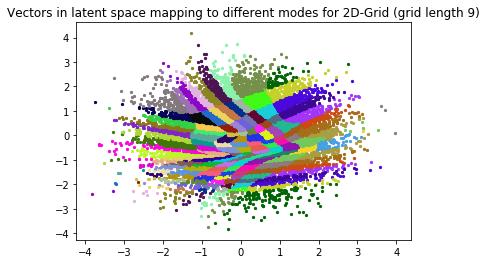

In [3]:
gan.visualize_latent_space(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

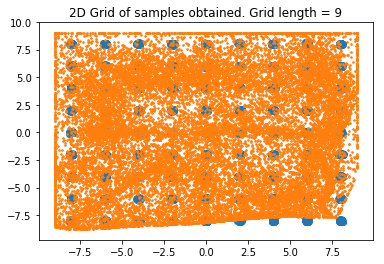

In [4]:
gan.visualize_model(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

In [19]:
reload(gan)

plt.rcParams['figure.figsize'] = [15, 15]


plt.clf()

# sample a point z at random and look at the projection approximation
num_trials = 1000
r = gan.gradient_free_avg_radius(loaded_gen, latent_dim=latent_dim, grid_length=grid_length, num_trials=num_trials)

# plt.scatter(*zip(*z.cpu().detach().numpy()), c=(0.0, 0.0, 0.0), marker="+", s=200)
# plt.scatter(*zip(*best_global_point), c = (1.0, 0.0, 0.0), marker="+", s=200)

# sidenote: look into white box adversarial attacks

Cuda: True
[Iteration 100] [Distance: 0.058132]
[Iteration 200] [Distance: 0.056373]
[Iteration 300] [Distance: 0.058206]
[Iteration 400] [Distance: 0.058110]
[Iteration 500] [Distance: 0.059866]
[Iteration 600] [Distance: 0.060216]
[Iteration 700] [Distance: 0.060908]
[Iteration 800] [Distance: 0.060745]
[Iteration 900] [Distance: 0.060836]
[Iteration 1000] [Distance: 0.061670]


<Figure size 1080x1080 with 0 Axes>

In [20]:
print(r)

0.06168087361442304
